# Bagging with Random Forest

#### Loading Libraries

In [62]:
# Numerical Computing
import numpy as np
# Data Manipulation
import pandas as pd
# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# DateTime Library
import datetime as dt

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import mean_squared_error as MSE, accuracy_score

#Extreme Gradient Boosting
from xgboost import XGBRegressor
from xgboost import XGBClassifier

# Warnings
import warnings

## Exploring Random Forest

#### Random Forest Classifier

In [14]:
warnings.filterwarnings('ignore')

#### Loading Data

In [15]:
df_census = pd.read_csv('census_cleaned.csv')
df_census.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_census = df_census.iloc[:, :-1]
y_census = df_census.iloc[:,-1]

In [17]:
# Initializing Model
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [18]:
# Applying Cross-Validation
scores = cross_val_score(rf, X_census, y_census, cv=5)

In [19]:
# Getting Outcomes
print('Accuracy: ', np.round(scores))
print('Accuracy mean: %0.3f' % (scores.mean()))

Accuracy:  [1. 1. 1. 1. 1.]
Accuracy mean: 0.850


#### Random Forest Regressor

In [20]:
df_bikes = pd.read_csv('bike_rentals_cleaned.csv')
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [21]:
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]

In [23]:
# Initializing Model
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs=-1)

In [24]:
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

In [25]:
rmse = np.sqrt(-scores)
print('RMSE: ', np.round(scores, 3))
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE:  [ -642379.504  -336385.439  -303983.222  -716896.979  -801114.298
 -1204553.538  -798768.036  -654941.32   -694701.782 -4601222.853]
RMSE mean: 945.365


### Random Forest HyperParameters

#### oob_score

In [26]:
rf = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)

In [27]:
rf.fit(X_census, y_census)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [29]:
rf.oob_score_

0.8343109855348423

#### n_estimators

In [30]:
rf = RandomForestClassifier(n_estimators=50, oob_score=True, random_state=2, n_jobs=-1)

In [31]:
rf.fit(X_census, y_census)

RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=2)

In [32]:
rf.oob_score_

0.8518780135745216

In [33]:
# Working on 100 Trees
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=2, n_jobs=-1)
rf.fit(X_census, y_census)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=2)

In [34]:
rf.oob_score_

0.8551334418476091

#### warm_start

In [42]:
sns.set()

In [43]:
# Working on warm start hyperparam

# Initializing on empty score list
oob_scores = []
# Initializing Model
rf = RandomForestClassifier(n_estimators=50, warm_start=True, oob_score=True, n_jobs=-1, random_state=2)

In [44]:
# Fitting Model
rf.fit(X_census, y_census)

RandomForestClassifier(n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=2, warm_start=True)

In [45]:
# Estimator List
oob_scores = [rf.oob_score_]
estimators = [50]

In [54]:
# for i in range(9):
#     est += 50
#     estimators.append(est)
#     rf.set_params(n_estimators=est)
#     rf.fit(X_census, y_census)
#     oob_scores.append(rf.oob_score_)

In [55]:
for i in range(1, 10):  
    est += 50
    rf.set_params(n_estimators=est)
    rf.fit(X_census, y_census)
    oob_scores.append(rf.oob_score_)
    estimators.append(est)

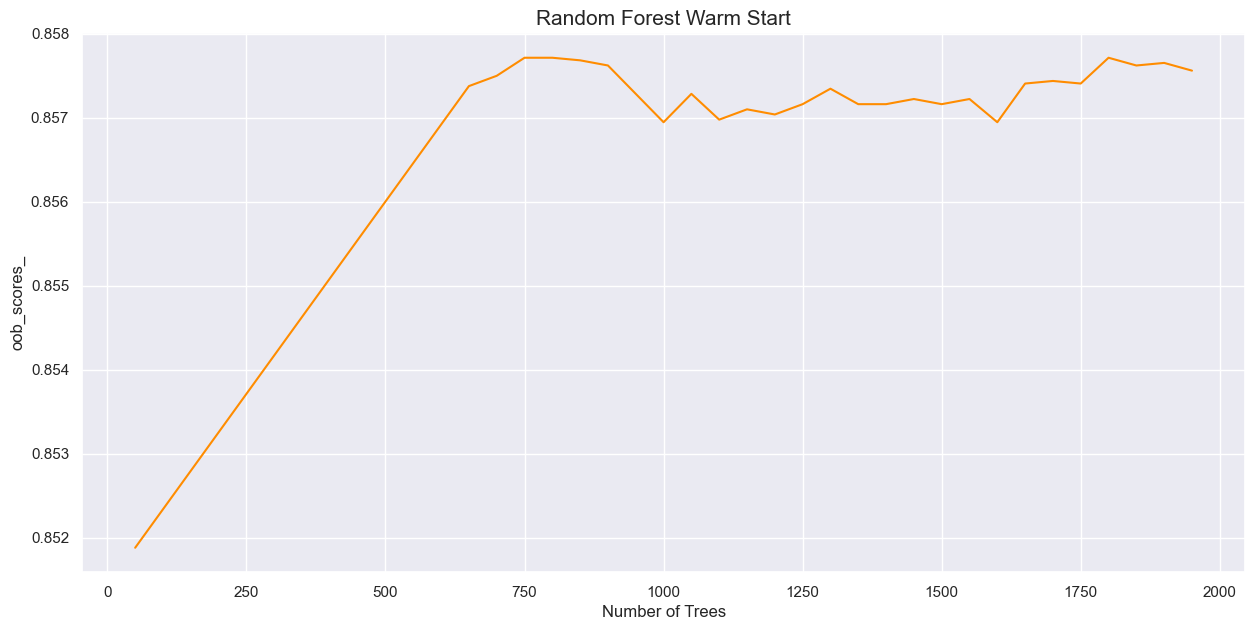

In [56]:
plt.figure(figsize=(15, 7))
plt.plot(estimators, oob_scores, color='darkorange')
plt.xlabel('Number of Trees')
plt.ylabel('oob_scores_')
plt.title('Random Forest Warm Start', fontsize=15)
plt.savefig('Random_Forest_Warm_Start', dpi=325)
plt.show()

## Pushing Random Forest Bounderies

#### Preparing Dataset

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [58]:
# Let's initialize the model
rf = RandomForestRegressor(n_estimators=50, warm_start=True, n_jobs=-1, random_state=2)

In [59]:
# Model Cross-Validation
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

In [60]:
rmse =np.sqrt(-scores)

In [61]:
# Checking outcomes
print('RMSE: ', np.round(scores,3))
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE:  [ -699702.407  -293653.502  -284180.498  -660615.066  -800805.697
  -776367.014  -630598.921  -687187.845  -596782.096 -4529015.208]
RMSE mean: 902.398


#### Fine-Tuning Hyperparameters

In [69]:
# Setting a Hyperparameter Grid
def randomized_search_reg(params, runs=16, reg=RandomForestRegressor(random_state=2, n_jobs=-1)):
    rand_reg = RandomizedSearchCV(reg, params, n_iter=runs, scoring='neg_mean_squared_error', cv=10, n_jobs=-1, random_state=2)
    # About model fitting
    rand_reg.fit(X_train, y_train)
    # About model estimator
    best_model = rand_reg.best_estimator_
    # About model params
    best_params = rand_reg.best_params_
    print("Best Params: ", best_params)
    # About scoring
    best_score = np.sqrt(-rand_reg.best_score_)
    print("Training score: {:.3f}".format(best_score))
    # On Prediction
    y_pred = best_model.predict(X_test)
    #
    rmse_test = MSE(y_test, y_pred)**0.5
    print('Test set score: {:.3f}'.format(rmse_test))

In [70]:
# Applying it
randomized_search_reg(params={'min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
                              'min_samples_split': [2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
                              'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
                              'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                              'max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None], 
                              'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth': [None, 2, 4, 6, 8, 10, 20]})

Best Params:  {'min_weight_fraction_leaf': 0.0, 'min_samples_split': 0.03, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.05, 'max_leaf_nodes': 25, 'max_features': 0.7, 'max_depth': None}
Training score: 759.076
Test set score: 701.802


In [71]:
# Narrowing the Range:
randomized_search_reg(params={'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
                              'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                              'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth': [None, 2, 4, 6, 8, 10, 20]})

Best Params:  {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 10}
Training score: 679.052
Test set score: 626.541


In [73]:
# Increasing "Run Numbers"
randomized_search_reg(params={'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
                              'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                              'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth': [None, 4, 6, 8, 10, 12, 15, 20]},
                    runs=20)

Best Params:  {'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
Training score: 675.128
Test set score: 619.014


In [74]:
# Narrowing range further:
randomized_search_reg(params={'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                              'min_impurity_decrease': [0.0, 0.01, 0.05, 0.08, 0.10, 0.12, 0.15],
                              'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth': [None, 8, 10, 12, 14, 16, 18, 20]})

Best Params:  {'min_samples_leaf': 1, 'min_impurity_decrease': 0.05, 'max_features': 0.7, 'max_depth': 18}
Training score: 679.595
Test set score: 630.954


In [75]:
#
randomized_search_reg(params={'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
                              'min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                              'max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                              'max_depth': [None, 4, 6, 8, 10, 12, 15, 20], 
                              'n_estimators': [100]}, runs=20)

Best Params:  {'n_estimators': 100, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.1, 'max_features': 0.6, 'max_depth': 12}
Training score: 675.128
Test set score: 619.014


In [77]:
# Placing Best Model - Initialization:
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1,
                           max_features=0.6, max_depth=12, warm_start=True, n_jobs=-1, random_state=2) 

In [79]:
# Cross-Validation Procedure
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)

In [80]:
rmse = np.sqrt(-scores)

In [81]:
# Getting model outcomes:
print('RMSE: ', np.round(-scores))
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE:  [ 669702.  264374.  299638.  662692.  592192.  532936.  691186.  631443.
  572791. 2544781.]
RMSE mean: 817.162


In [82]:
# Fluffing the Data
from sklearn.utils import shuffle

In [88]:
df_shuffle_bikes = shuffle(df_bikes, random_state=2)

In [89]:
X_shuffle_bikes = df_shuffle_bikes.iloc[:, :-1]
y_shuffle_bikes = df_shuffle_bikes.iloc[:, -1]

In [90]:
rf = RandomForestRegressor(n_estimators=100, min_impurity_decrease=0.1, max_features=0.6, max_depth=12, n_jobs=-1, random_state=2)

In [91]:
scores = cross_val_score(rf, X_shuffle_bikes, y_shuffle_bikes, scoring='neg_mean_squared_error', cv=10)

In [93]:
rmse = np.sqrt(-scores)

In [95]:
# Final Outcomes with shuffle optimization
print('RMSE:', np.round(rmse, 3))
print('RMSE mean: %0.3f' % (rmse.mean()))

RMSE: [630.093 686.673 468.159 526.676 593.033 724.575 774.402 672.63  760.253
 616.797]
RMSE mean: 645.329
